In [2]:
import pandas as pd
import os
from pathlib import Path

ROOT = Path(os.getcwd()).resolve().parent.parent


df=pd.read_csv( ROOT / "Experiments/Results/baseline/all_compliante_scenarios_allbaseline.csv")
df=df[df.method.isin(['Magneto', 'MagnetoGPT', 'MagnetoFT', 'MagnetoFTGPT', 'Coma++',
       'ISResMat', 'Distribution', 'SimFlooding', 'Coma', 'Cupid'])]


df = df.rename(columns={
    'Scenario': 'scenario',
    'Category': 'category',
    'Dataset': 'dataset',
    'Model': 'model',
    'Relation': 'relation',
    'total_time_sec': 'runtime'
})


df_meta= pd.read_csv( ROOT / "Experiments/Results/effeciency/final_time_before_after_fs_bis.csv")
dd1=df_meta[['scenario'	,'category'	,'relation',	'dataset',	'model','N',	'M'	,'P',	'time_before']]
dd1["method"]="Meta Space"

dd1 = dd1.rename(columns={
    "relation": "relation",
    "time_before": "runtime"
    })


df_meta= pd.read_csv( ROOT / "Experiments/Results/effeciency/final_time_before_after_fs_bis.csv")
dd2=df_meta[['scenario'	,'category'	,'relation',	'dataset',	'model','N',	'M'	,'P',	'time_after']]
dd2["method"]="Meta Space Reduced"
dd2["scenario"]=dd2["scenario"].str.replace("2","")

dd2 = dd2.rename(columns={
    "relation": "relation",
    "time_after": "runtime"
    })



dd_=pd.concat([dd1,dd2])

dd=dd_[dd_.model=="minilm"]

dd.scenario=dd.scenario.str.replace("2","")
df_merged = pd.concat([df, dd], ignore_index=True, sort=False)
import pandas as pd

# Filtrage propre
df_stats = df_merged.dropna(subset=["scenario", "runtime"]).copy()

# Renommage uniformisé (comme tes graphiques)
df_stats["method"] = df_stats["method"].replace({"ComaInst": "Coma++"})

# Liste des scénarios dans ton code
scenario_map = {
    "si_si": "(S1, I1) ↔ (S2, I2)",
    "s_s_bis": "(S1, ∅) ↔ (S2, ∅)",
    "i_i_bis": "(∅, I1) ↔ (∅, I2)"
}

df_stats["ScenarioLabel"] = df_stats["scenario"].map(scenario_map)

# === CALCUL DES STATISTIQUES ===
stats = (
    df_stats.groupby(["ScenarioLabel", "method"])["runtime"]
    .agg(["count", "min", "max", "median", "mean", "std"])
    .reset_index()
    .sort_values(["ScenarioLabel", "method"])
)

# Arrondir pour lisibilité
stats = stats.round(4)

# Affichage final
stats


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/275081220.py:8: DtypeWarning: Columns (7,8,9,10,11,12,13,14,28,29,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv( ROOT / "Experiments/Results/baseline/all_compliante_scenarios_allbaseline.csv")
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/275081220.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd.scenario=dd.scenario.str.replace("2","")


,ScenarioLabel,method,count,min,max,median,mean,std
0,"(S1, I1) ↔ (S2, I2)",Coma,654,0.9530,3.9670,1.7760,2.0902,0.7187
1,"(S1, I1) ↔ (S2, I2)",Coma++,1984,12.4700,518.9930,88.0060,133.0407,120.5313
2,"(S1, I1) ↔ (S2, I2)",Cupid,782,3.0440,411.3170,48.1220,70.7213,69.1066
3,"(S1, I1) ↔ (S2, I2)",Distribution,1061,0.7580,161.1320,14.4580,29.4052,33.2131
4,"(S1, I1) ↔ (S2, I2)",ISResMat,550,6.1450,445.1460,83.0495,89.2292,79.8066
5,"(S1, I1) ↔ (S2, I2)",Magneto,247,2.6470,14.1890,8.2370,8.4588,2.8936
6,"(S1, I1) ↔ (S2, I2)",MagnetoFT,245,3.0020,13.7500,7.8890,8.1741,2.7646
7,"(S1, I1) ↔ (S2, I2)",MagnetoFTGPT,242,7.1530,366.4290,75.6030,95.2054,74.4626
8,"(S1, I1) ↔ (S2, I2)",MagnetoGPT,245,7.5180,347.2390,79.2170,97.7727,74.2545
9,"(S1, I1) ↔ (S2, I2)",Meta Space,551,6.9650,704.9810,103.2720,183.9211,178.6941


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/1314950815.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/1314950815.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/1314950815.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/1314950815.py:106: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  plt

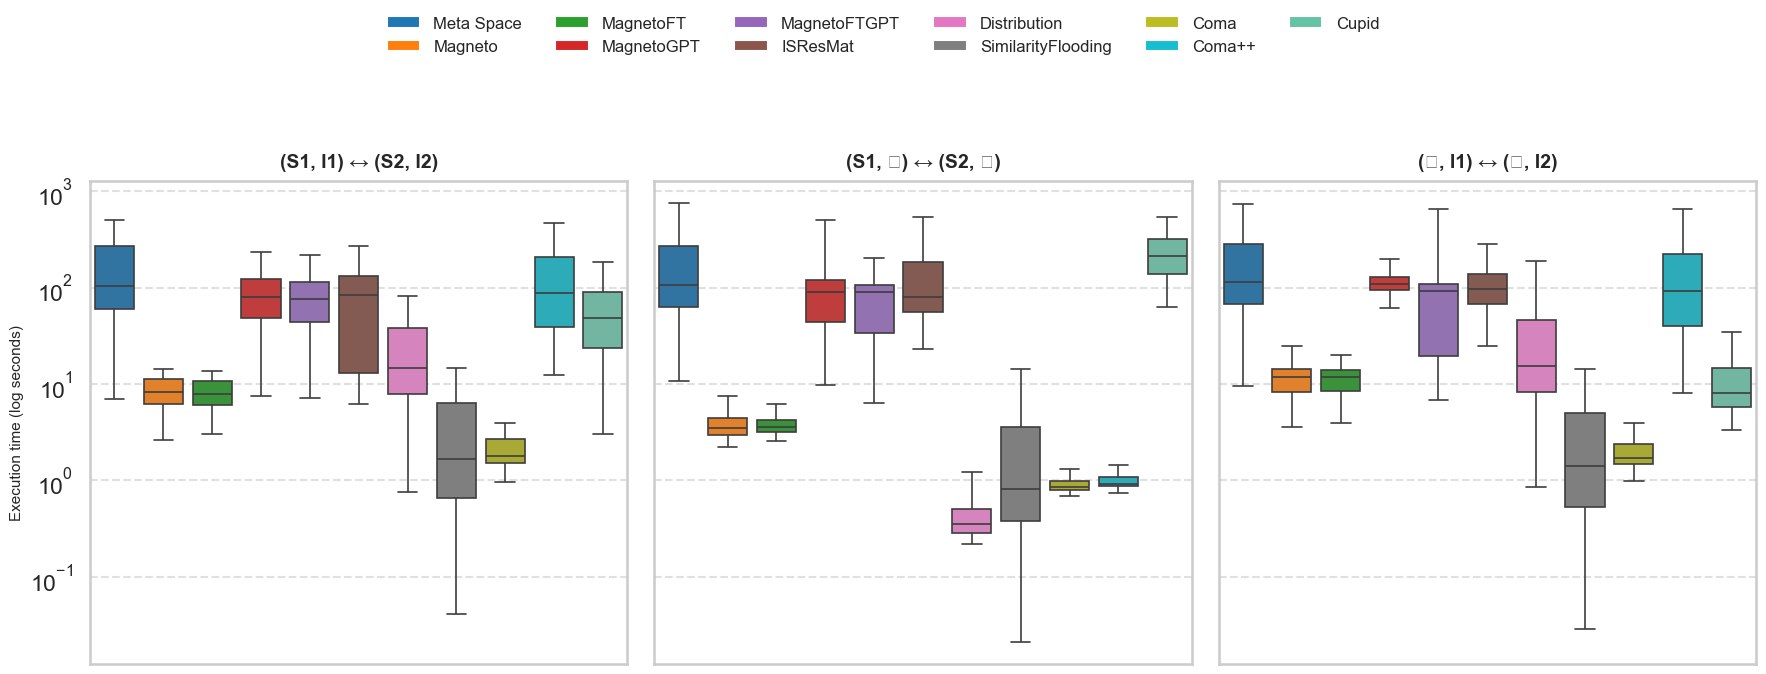

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# -----------------------------
# ⚙️ Paramètres et préparation
# -----------------------------
df_all = df_merged.dropna(subset=["scenario", "method", "runtime"]).reset_index(drop=True)

df_all["method"] = df_all["method"].replace({
    "ComaInst": "Coma++",
    "SimFlooding": "SimilarityFlooding"
})

# --- Ordre cohérent des méthodes ---
method_order = [
    "Meta Space", 
    # "Meta Space Reduced",
    "Magneto", "MagnetoFT", "MagnetoGPT", "MagnetoFTGPT",
    "ISResMat", "Distribution", "SimilarityFlooding", "Coma", "Coma++", "Cupid"
]
method_order = [m for m in method_order if m in df_all["method"].unique()]

# --- Liste des scénarios ---
scenarios = sorted(df_all["scenario"].unique())

# --- Palette cohérente ---
colors = sns.color_palette("tab10") + sns.color_palette("Set2") + sns.color_palette("Dark2")
colors = colors[:len(method_order)]
palette_dict = dict(zip(method_order, colors))

sns.set_theme(style="whitegrid", context="talk")
scenarios=['si_si', 's_s_bis','i_i_bis']

# --- Labels lisibles pour les scénarios ---
scenarios_label = {
    "i_i_bis": "(∅, I1) ↔ (∅, I2)",     
    "s_s_bis": "(S1, ∅) ↔ (S2, ∅)",
    "si_si": "(S1, I1) ↔ (S2, I2)",      

}


# -----------------------------
# 🎨 Création de la figure
# -----------------------------
ncols = len(scenarios)
fig, axes = plt.subplots(1, ncols, figsize=(6*ncols, 6), sharey=True)

if ncols == 1:
    axes = [axes]

for ax, sc in zip(axes, scenarios):
    subset = df_all[df_all["scenario"] == sc]
    if subset.empty:
        ax.axis("off")
        continue

    sns.boxplot(
        data=subset,
        x="method",
        y="runtime",
        order=method_order,
        palette=palette_dict,
        showfliers=False,
        linewidth=1.2,
        ax=ax
    )

    ax.set_yscale("log")

    # 🔹 Utiliser le label joli s’il existe
    scenario_title = scenarios_label.get(sc, sc)
    ax.set_title(scenario_title, fontsize=14, fontweight="bold", pad=10)

    ax.set_xlabel("")
    ax.set_ylabel("Execution time (log seconds)", fontsize=11)
    ax.tick_params(axis="x", bottom=False, labelbottom=False)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# -----------------------------
# 🧩 Légende
# -----------------------------
legend_elements = [Patch(facecolor=palette_dict[m], label=m) for m in method_order]
fig.legend(
    handles=legend_elements,
    title="",
    loc="upper center",
    ncol=6,
    bbox_to_anchor=(0.5, 1.15),
    fontsize=12,
    title_fontsize=13,
    frameon=False
)

# -----------------------------
# 🏷️ Titre global
# -----------------------------
fig.suptitle(
    "",
    fontsize=16,
    fontweight="bold",
    y=1.08
)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()
plt.close()

/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/3432216280.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/3432216280.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([model_name[m] for m in models], rotation=35, fontsize=10)
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/3432216280.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_96983/3432216280.py:54: UserWarning: set_ticklabels() should only be used with a fixed n

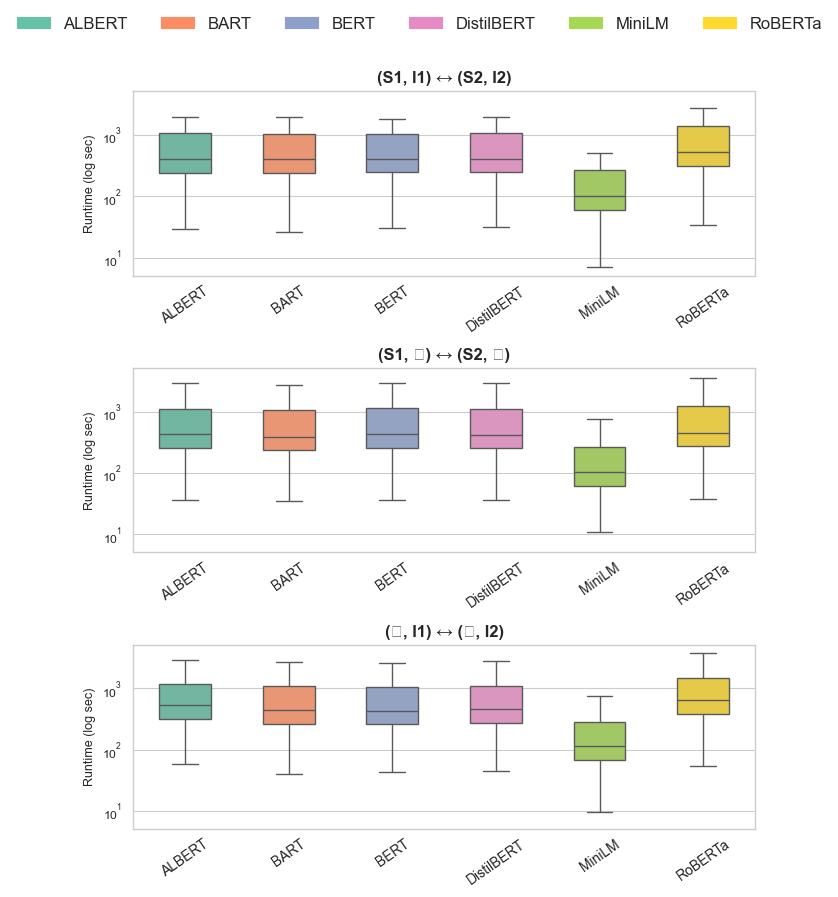

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Filtrer Meta Space ---
dd1_meta = dd1[dd1["method"] == "Meta Space"][["scenario", "model", "runtime"]].copy()

# --- Labels propres ---
scenarios_label = {
    "si_si2": "(S1, I1) ↔ (S2, I2)",
    "i_i_bis": "(∅, I1) ↔ (∅, I2)",
    "s_s_bis": "(S1, ∅) ↔ (S2, ∅)"
}

scenarios_order = ["si_si2", "s_s_bis", "i_i_bis"]

# --- Noms lisibles des modèles ---
model_name = {
    "albert": "ALBERT",
    "bart": "BART",
    "bert": "BERT",
    "distilbert": "DistilBERT",
    "minilm": "MiniLM",
    "roberta": "RoBERTa"
}

models = list(model_name.keys())  # garder l’ordre exact

# --- Palette Set2 jolie ---
palette = sns.color_palette("Set2", len(models))
palette_dict = dict(zip(models, palette))

sns.set_theme(style="whitegrid", context="paper")

# --- Figure verticale ---
fig, axes = plt.subplots(len(scenarios_order), 1, figsize=(7, 9), sharey=True)

for ax, sc in zip(axes, scenarios_order):

    subset = dd1_meta[dd1_meta["scenario"] == sc]

    sns.boxplot(
        data=subset,
        x="model",
        y="runtime",
        order=models,          # ← ordre cohérent des modèles
        hue=None,
        showfliers=False,
        palette=palette_dict,
        width=0.5,
        ax=ax
    )

    # remplacer les labels X par les noms lisibles
    ax.set_xticklabels([model_name[m] for m in models], rotation=35, fontsize=10)

    ax.set_yscale("log")
    ax.set_title(scenarios_label[sc], fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Runtime (log sec)", fontsize=9)
    ax.tick_params(axis="x", pad=1)

# --- Légende globale avec noms lisibles ---
fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=palette_dict[m]) for m in models],
    labels=[model_name[m] for m in models],
    loc="upper center",
    ncol=len(models),
    bbox_to_anchor=(0.5, 1),
    fontsize=12,
    frameon=False
)

plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.5)
plt.show()


/var/folders/xq/fsd3j4yj54g_j807v45_0_p80000gn/T/ipykernel_37779/3913062904.py:68: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Times New Roman.
  plt.tight_layout()
/Users/nourkired/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


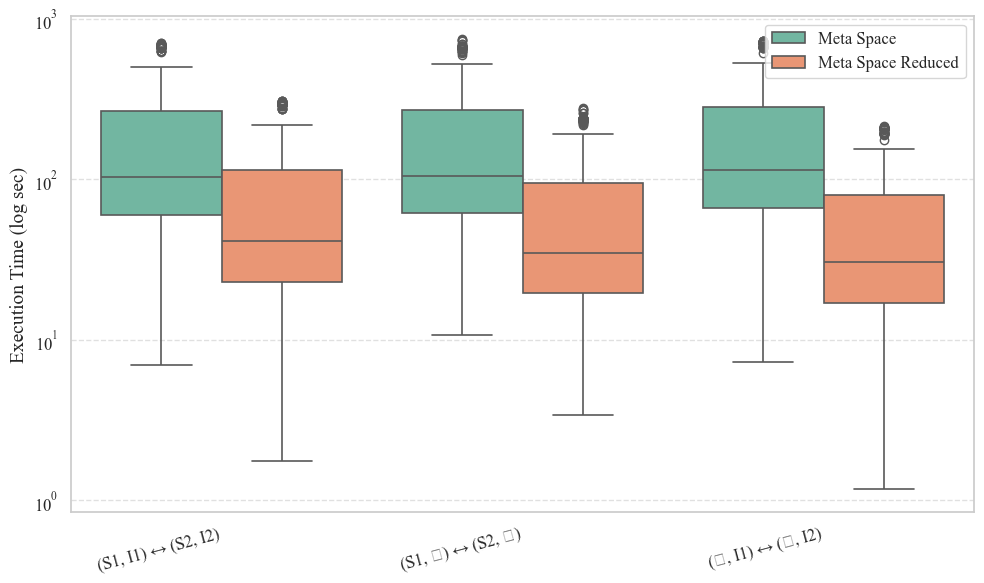

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------

dd1_ = dd1[dd1["model"] == "minilm"]
dd2_ = dd2[dd2["model"] == "minilm"]

# Fusion propre
dd = pd.concat([dd1_, dd2_], ignore_index=True)
dd.scenario=dd.scenario.str.replace("2","")
sns.set_theme(style="whitegrid")

# -----------------------------
# 2) Set des polices
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Computer Modern Roman"],
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

# -----------------------------
# 3) Mapping des labels scénario
# -----------------------------
scenario_labels = {
    "si_si": "(S1, I1) ↔ (S2, I2)",
    "s_s_bis": "(S1, ∅) ↔ (S2, ∅)",
    "i_i_bis": "(∅, I1) ↔ (∅, I2)"
}

dd["Scenario_label"] = dd["scenario"].map(scenario_labels)
dd["runtime"] = dd["runtime"].clip(lower=1e-2)

order = ["si_si", "s_s_bis", "i_i_bis"]
order_labels = [scenario_labels[o] for o in order]

# -----------------------------
# 4) Boxplot final
# -----------------------------
plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=dd,
    x="Scenario_label",
    y="runtime",
    hue="method",
    palette="Set2",
    order=order_labels,
    linewidth=1.2,
    showfliers=True
)

ax.set_yscale("log")
plt.ylabel("Execution Time (log sec)")
plt.xlabel("")
plt.xticks(rotation=15, ha="right")
plt.legend(title="", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
